In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
sns.set()
import seaborn as sns
sns.set(style="white", color_codes=True)

In [4]:
df = pd.read_csv('Dataset_spine.csv')
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slpoe,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


DATA PREPROCESSING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slpoe              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Class_att                 310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [6]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slpoe', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'Class_att'],
      dtype='object')

In [7]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slpoe                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Class_att                   0
dtype: int64

In [8]:
df.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slpoe,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
sacral_slpoe,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


EXPLORATORY ANALYSIS

Text(0.5, -1.2, 'Heatmap of features')

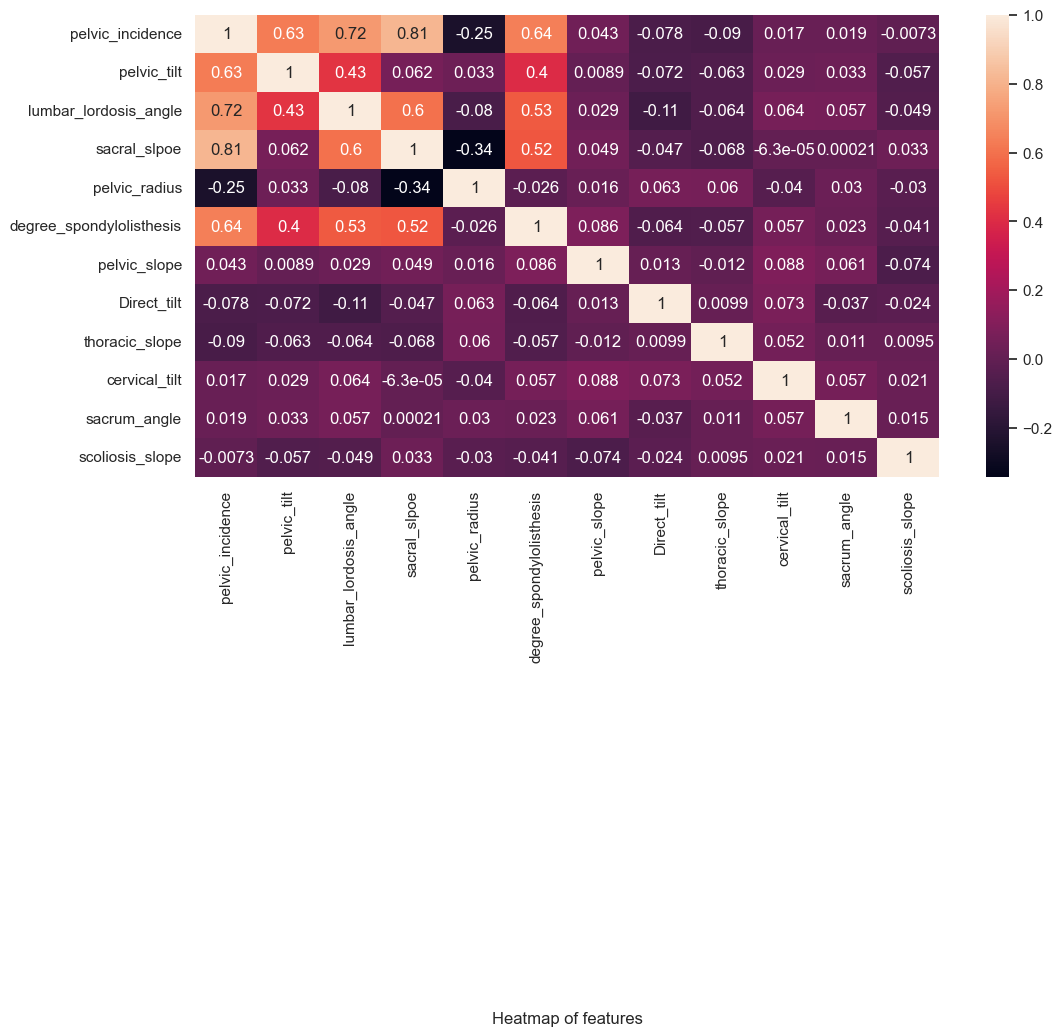

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True)
plt.title("Heatmap of features", y=-1.2)
 

In [10]:
eda = df.iloc[:, 0:13]
eda.head(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slpoe,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [11]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slpoe              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Class_att                 310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


<AxesSubplot:>

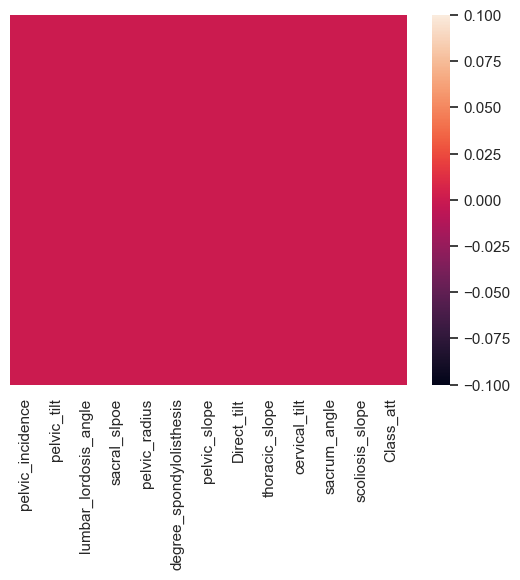

In [12]:
sns.heatmap(eda.isnull(), yticklabels = False)

<AxesSubplot:>

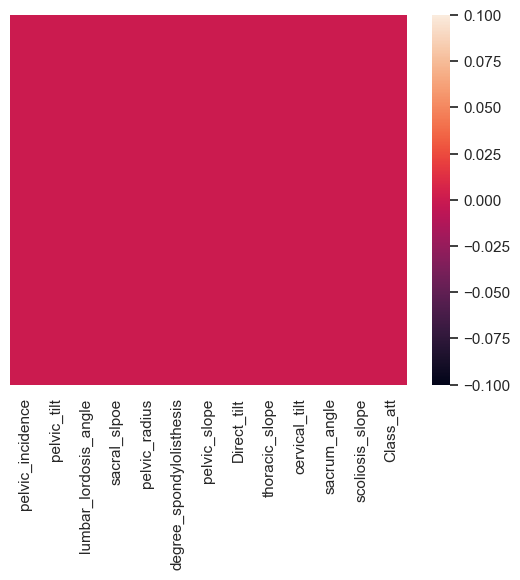

In [13]:
eda.dropna(inplace=True)
sns.heatmap(eda.isnull(), yticklabels = False)
 

Abnormal    210
Normal      100
Name: Class_att, dtype: int64

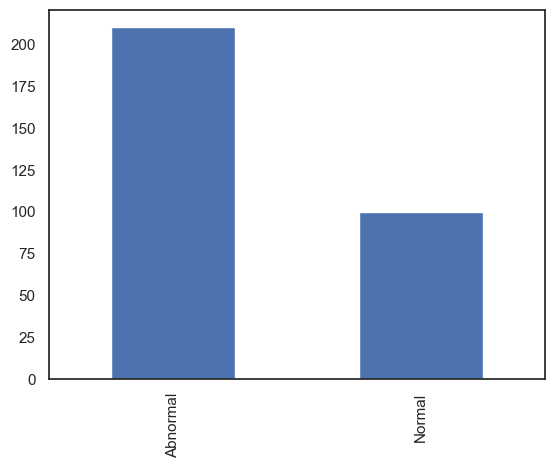

In [14]:
eda["Class_att"].value_counts().plot(kind="bar")
eda["Class_att"].value_counts()

In [15]:
eda["Class_att"].value_counts()

Abnormal    210
Normal      100
Name: Class_att, dtype: int64

In [16]:
eda.Class_att.nunique()

2

In [17]:
eda.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slpoe                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Class_att                   0
dtype: int64

Abnormal    210
Normal      100
Name: Class_att, dtype: int64


<AxesSubplot:ylabel='Type'>

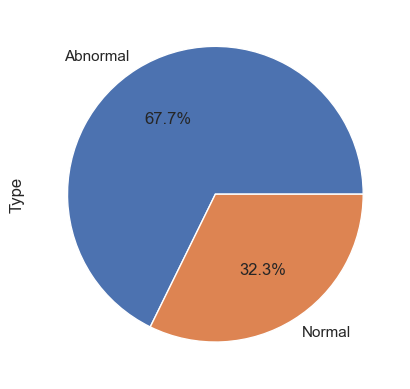

In [18]:
print(eda["Class_att"].value_counts())

eda.groupby('Class_att').size().plot(kind='pie',
                                       y = "Class_att",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [19]:
for col in eda.select_dtypes(include=['object']):
    eda[col] = eda[col].astype('category')

In [20]:
for col in eda.select_dtypes(include=['category']):
    eda[col] = eda[col].cat.codes

In [21]:
eda["Class_att"].value_counts()

0    210
1    100
Name: Class_att, dtype: int64

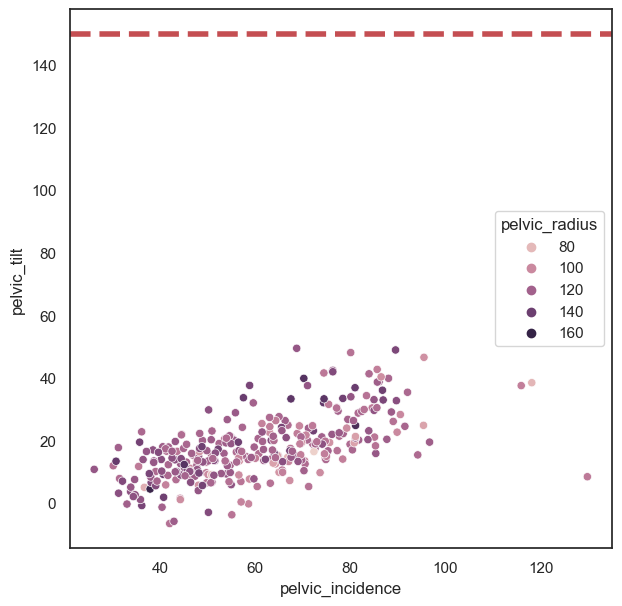

In [22]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=eda, x="pelvic_incidence", y="pelvic_tilt", hue='pelvic_radius')
graph.axhline(y= 150, linewidth=4, color='r', linestyle= '--')
plt.show()

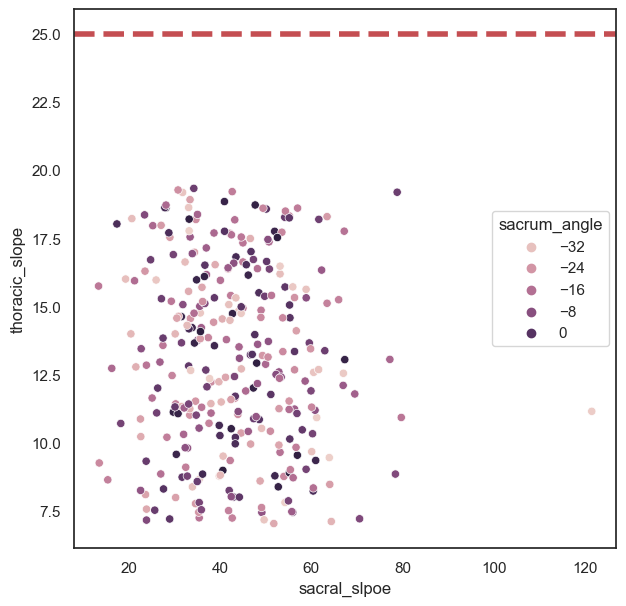

In [23]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=eda, x="sacral_slpoe", y="thoracic_slope", hue='sacrum_angle')
graph.axhline(y= 25, linewidth=4, color='r', linestyle= '--')
plt.show()

c:\Users\Famubukky\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\Famubukky\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.git

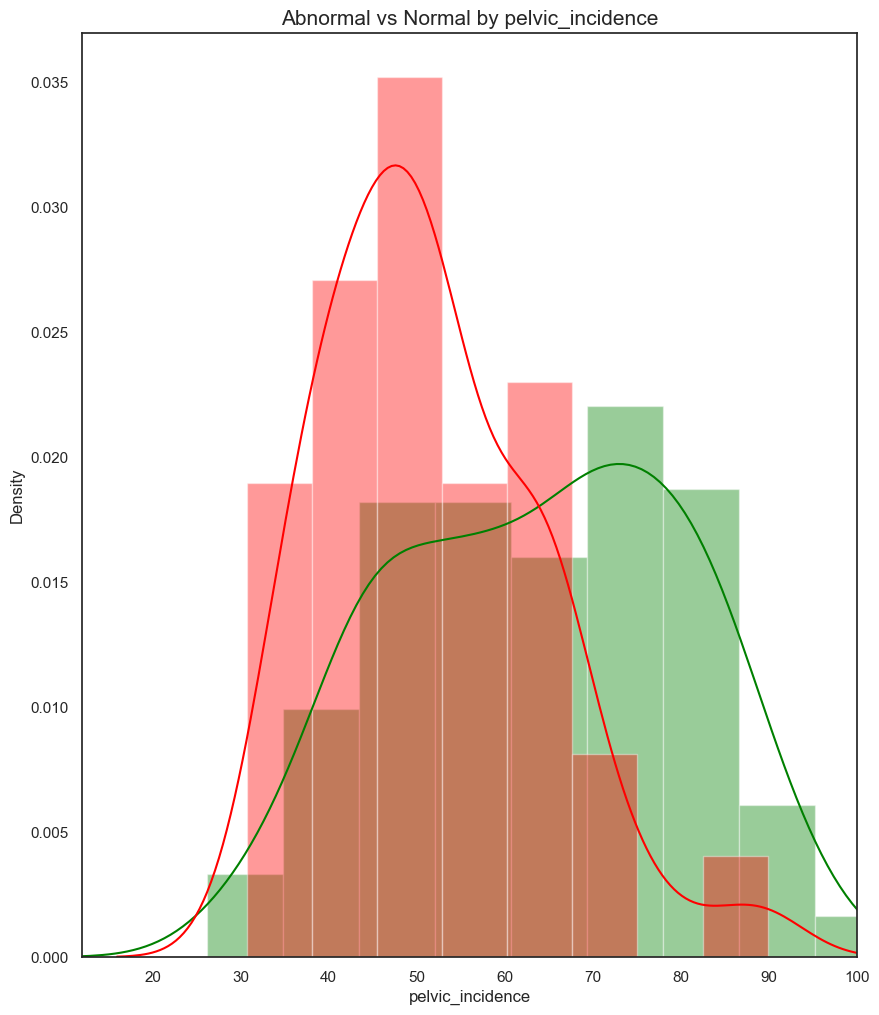

In [24]:
plt.figure(figsize=(10,12))

sns.distplot(eda[eda['Class_att'] == 0]["pelvic_incidence"], color='green') # Abnormal - green
sns.distplot(eda[eda['Class_att'] == 1]["pelvic_incidence"], color='red') # Normal - Red

plt.title('Abnormal vs Normal by pelvic_incidence', fontsize=15)
plt.xlim([12,100])
plt.show()

63.027817    1
56.535051    1
54.920858    1
38.505273    1
48.259920    1
            ..
70.399308    1
79.938570    1
84.585607    1
58.521623    1
33.841641    1
Name: pelvic_incidence, Length: 310, dtype: int64


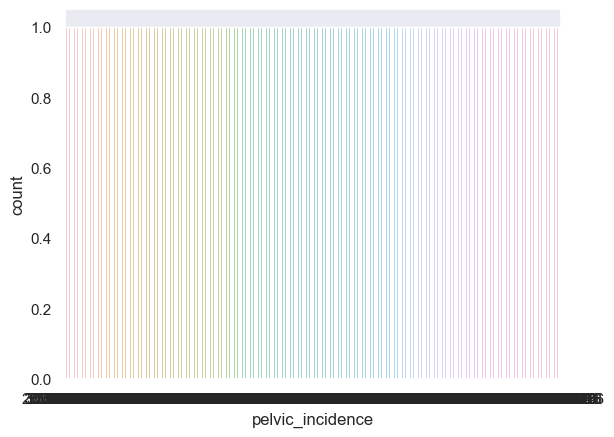

In [25]:
print(eda.pelvic_incidence.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=eda, x="pelvic_incidence")
plt.show()

In [26]:
#Extracting Independent and dependent Variable  
X= eda.iloc[:, 0:12].values  
y= eda.iloc[:, 12].values  
X
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [27]:
X.shape

(310, 12)

In [28]:
y.shape

(310,)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE


In [30]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_X= StandardScaler()    
X= st_X.fit_transform(X)    
     

In [31]:
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_resample(X, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

Before OverSampling, counts of label '1': 100
Before OverSampling, counts of label '0': 210 

After OverSampling, the shape of train_X: (420, 12)
After OverSampling, the shape of train_y: (420,) 

After OverSampling, counts of label '1': 210
After OverSampling, counts of label '0': 210


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)

print(" X_train dataset: ", X_train.shape)
print(" y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print(" y_test dataset: ", y_test.shape)

 X_train dataset:  (294, 12)
 y_train dataset:  (294,)
X_test dataset:  (126, 12)
 y_test dataset:  (126,)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

SUPPORT VECTOR MACHINE

In [35]:
from sklearn.svm import SVC # "Support vector classifier"  
svc = SVC()

In [36]:
from sklearn.svm import SVC # "Support vector classifier"  
svc = SVC(kernel='linear', random_state=0).fit(X_train, y_train)  

In [37]:
#Predicting the test set result

y_pred_svc= svc.predict(X_test)  
y_pred_svc

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int8)

In [38]:
cm_svc= confusion_matrix(y_test, y_pred_svc)  
cm_svc

array([[50, 15],
       [ 7, 54]], dtype=int64)

In [39]:
model_acuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Model accuracy is :",model_acuracy_svc)

Model accuracy is : 0.8253968253968254


In [40]:
svc_report= classification_report(y_test, y_pred_svc)
print("SVC model report")
print("__________________")
print(svc_report)

SVC model report
__________________
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        65
           1       0.78      0.89      0.83        61

    accuracy                           0.83       126
   macro avg       0.83      0.83      0.83       126
weighted avg       0.83      0.83      0.83       126



In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

DECISION TREE CLASSIFIER

In [42]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
dct= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dct.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [43]:
#Predicting the test set result  
y_pred_dct= dct.predict(X_test)
y_pred_dct

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int8)

In [44]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_dct= confusion_matrix(y_test, y_pred_dct)  
cm_dct

array([[49, 16],
       [10, 51]], dtype=int64)

In [45]:
y_prob_dct = dct.predict_proba(X_test)[:,1]
y_prob_dct

array([0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 1.])

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [47]:
model_acuracy_dct = accuracy_score(y_test, y_pred_dct)
print("Model accuracy is :",model_acuracy_dct)

Model accuracy is : 0.7936507936507936


In [48]:
DecisionTree_report= classification_report(y_test, y_pred_dct)
print("Decision Tree model report")
print("__________________")
print(DecisionTree_report)

Decision Tree model report
__________________
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        65
           1       0.76      0.84      0.80        61

    accuracy                           0.79       126
   macro avg       0.80      0.79      0.79       126
weighted avg       0.80      0.79      0.79       126



              precision    recall  f1-score   support

           0       0.83      0.75      0.79        65
           1       0.76      0.84      0.80        61

    accuracy                           0.79       126
   macro avg       0.80      0.79      0.79       126
weighted avg       0.80      0.79      0.79       126

ROC AUC score: 0.7949558638083228
Accuracy Score:  0.7936507936507936


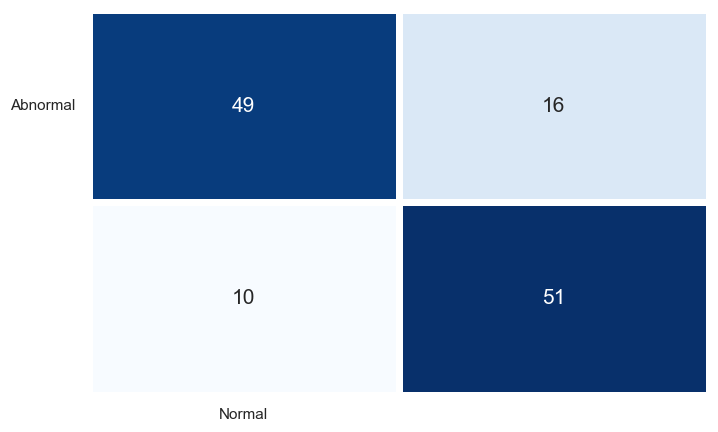

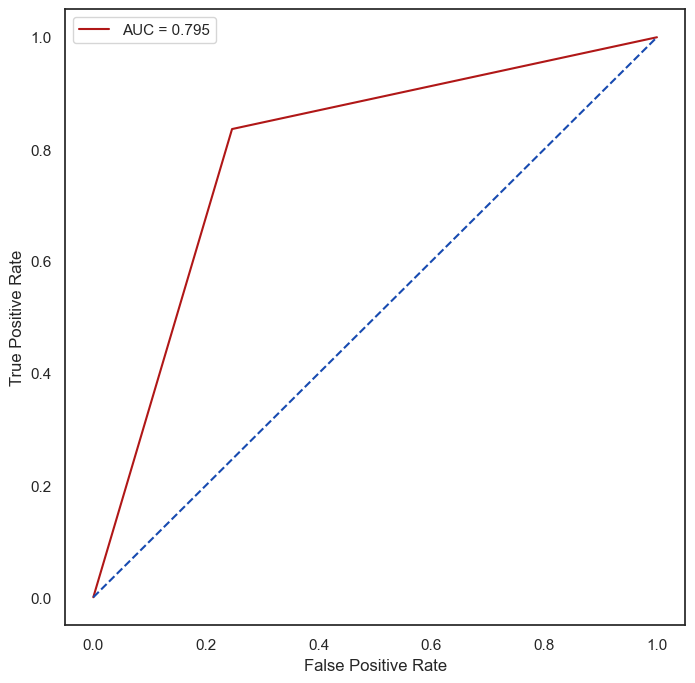

In [49]:
print(classification_report(y_test, y_pred_dct))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob_dct)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred_dct))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm_dct, cmap = 'Blues',
            annot = True,
            fmt = 'd',
            linewidths = 5,
            cbar = False,
            annot_kws = {'fontsize': 15}, 
            yticklabels = ["Abnormal"],
            xticklabels = ["Normal"])
plt.yticks(rotation = 0)
plt.show()
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_dct)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

LOGISTICS REGRESSION

In [50]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
log= LogisticRegression(random_state=0)  
log.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [51]:
#Predicting the test set result  
y_pred_log= log.predict(X_test)  
y_pred_log

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int8)

In [52]:
y_prob_log = log.predict_proba(X_test)[:,1]
y_prob_log

array([4.66882402e-02, 7.50523008e-01, 5.99096606e-01, 1.88427887e-02,
       2.88391931e-03, 2.86628873e-03, 6.81216552e-01, 8.87979197e-01,
       1.92366417e-03, 9.76474316e-01, 6.89316439e-02, 5.13533420e-02,
       5.96444823e-02, 7.22641182e-01, 8.56758397e-01, 1.85081641e-03,
       2.51804145e-03, 8.60425443e-01, 9.90289260e-01, 9.93806937e-01,
       3.91039486e-01, 8.35587115e-01, 8.93223344e-01, 2.92998199e-02,
       3.96618293e-01, 4.52713254e-01, 8.31355291e-01, 8.10029796e-03,
       1.32651966e-02, 8.96661591e-05, 8.91652065e-01, 8.12828563e-01,
       8.90506432e-01, 3.68146787e-01, 2.91034227e-05, 9.59374068e-01,
       8.13265525e-01, 6.73839716e-02, 2.27854346e-05, 7.86117708e-01,
       4.57793052e-01, 6.39853347e-01, 1.43052654e-05, 9.25415999e-01,
       7.32404643e-04, 5.89845439e-07, 9.55018584e-02, 8.14778198e-04,
       3.11949419e-01, 2.53088498e-02, 1.44587759e-02, 8.73963271e-01,
       9.63786165e-01, 8.93311009e-01, 3.72774807e-02, 9.57436321e-01,
      

In [53]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_log= confusion_matrix(y_test, y_pred_log)  
cm_log

array([[49, 16],
       [ 6, 55]], dtype=int64)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [55]:
model_acuracy_log = accuracy_score(y_test, y_pred_log)
print("Model accuracy is :",model_acuracy_log)

Model accuracy is : 0.8253968253968254


In [56]:
Logistics_report = classification_report(y_test, y_pred_log)
print("Logistics Regression model report")
print("__________________")
print(Logistics_report)

Logistics Regression model report
__________________
              precision    recall  f1-score   support

           0       0.89      0.75      0.82        65
           1       0.77      0.90      0.83        61

    accuracy                           0.83       126
   macro avg       0.83      0.83      0.82       126
weighted avg       0.83      0.83      0.82       126



              precision    recall  f1-score   support

           0       0.89      0.75      0.82        65
           1       0.77      0.90      0.83        61

    accuracy                           0.83       126
   macro avg       0.83      0.83      0.82       126
weighted avg       0.83      0.83      0.82       126

ROC AUC score: 0.9177805800756621
Accuracy Score:  0.8253968253968254


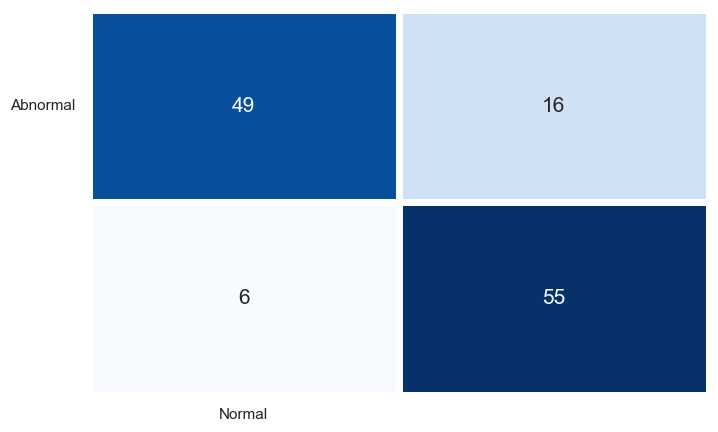

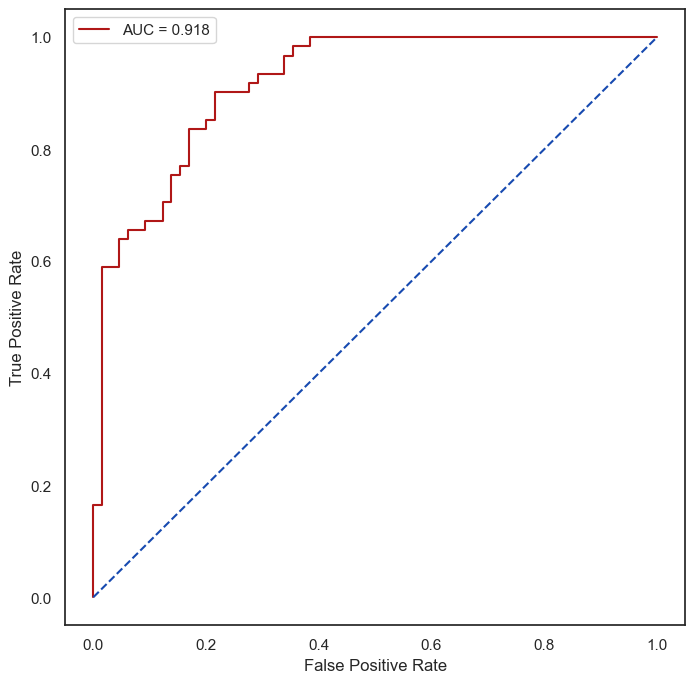

In [57]:
print(classification_report(y_test, y_pred_log))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob_log)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred_log))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm_log, cmap = 'Blues',
            annot = True,
            fmt = 'd', 
            linewidths = 5,
            cbar = False,
            annot_kws = {'fontsize': 15}, 
            yticklabels = ["Abnormal"],
            xticklabels = ["Normal"])
plt.yticks(rotation = 0)
plt.show()
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_log)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

RANDOM FOREST CLASSIFICATION

In [58]:
#Fitting  RandomForestClassifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
random= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
random.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [59]:
#Predicting the test set result  
y_pred_random= random.predict(X_test) 
y_prob_random = random.predict_proba(X_test)[:,1]
y_pred_random
y_prob_random

array([0. , 1. , 0.8, 0. , 0.1, 0. , 0.3, 0.7, 0. , 1. , 0. , 0.1, 0. ,
       0.8, 0.7, 0.1, 0. , 0.8, 1. , 1. , 0.4, 0.5, 0.9, 0.1, 0.7, 0.8,
       0.9, 0. , 0. , 0. , 0.9, 0.6, 1. , 0.2, 0. , 1. , 0.7, 0. , 0. ,
       1. , 0.9, 0.8, 0. , 1. , 0. , 0.1, 0.3, 0. , 0.1, 0.1, 0. , 1. ,
       1. , 0.9, 0. , 0.9, 1. , 0.3, 1. , 0. , 0.7, 0.8, 0. , 0.9, 0. ,
       0.5, 0.1, 0.7, 1. , 1. , 0.9, 0.6, 0.3, 0.2, 0.5, 0.1, 0.9, 0.2,
       0.3, 0.8, 0.8, 0.8, 0.6, 1. , 0.3, 0.1, 1. , 0. , 0.7, 0.9, 0.4,
       0.8, 0.7, 0.9, 0. , 0.7, 0.4, 1. , 0.8, 0.8, 0.6, 0.8, 0. , 0.5,
       0.4, 0. , 0.7, 0.9, 0. , 0.9, 1. , 1. , 0.6, 1. , 0.9, 0.1, 0. ,
       0.1, 0.9, 0. , 0. , 0. , 0.9, 0.8, 0.8, 0.9])

In [60]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_random= confusion_matrix(y_test, y_pred_random)  
cm_random

array([[56,  9],
       [ 3, 58]], dtype=int64)

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [62]:
model_acuracy_random = accuracy_score(y_test, y_pred_random)
print("Model accuracy is :",model_acuracy_random)

Model accuracy is : 0.9047619047619048


In [63]:
Random_report= classification_report(y_test, y_pred_random)
print("Random Forest model report")
print("__________________")
print(Random_report)

Random Forest model report
__________________
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        65
           1       0.87      0.95      0.91        61

    accuracy                           0.90       126
   macro avg       0.91      0.91      0.90       126
weighted avg       0.91      0.90      0.90       126



              precision    recall  f1-score   support

           0       0.95      0.86      0.90        65
           1       0.87      0.95      0.91        61

    accuracy                           0.90       126
   macro avg       0.91      0.91      0.90       126
weighted avg       0.91      0.90      0.90       126

ROC AUC score: 0.9315258511979824
Accuracy Score:  0.9047619047619048


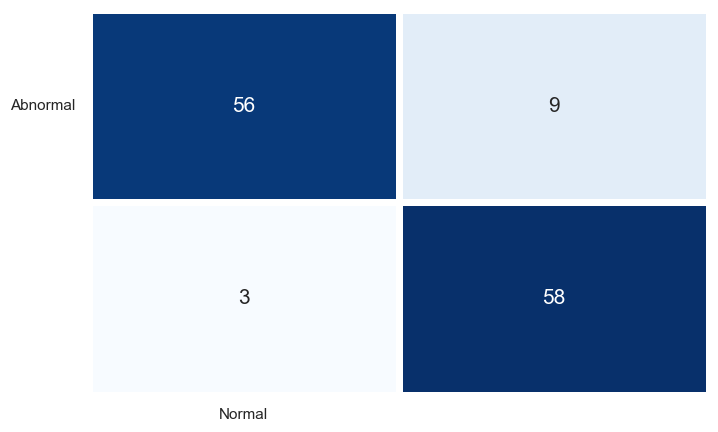

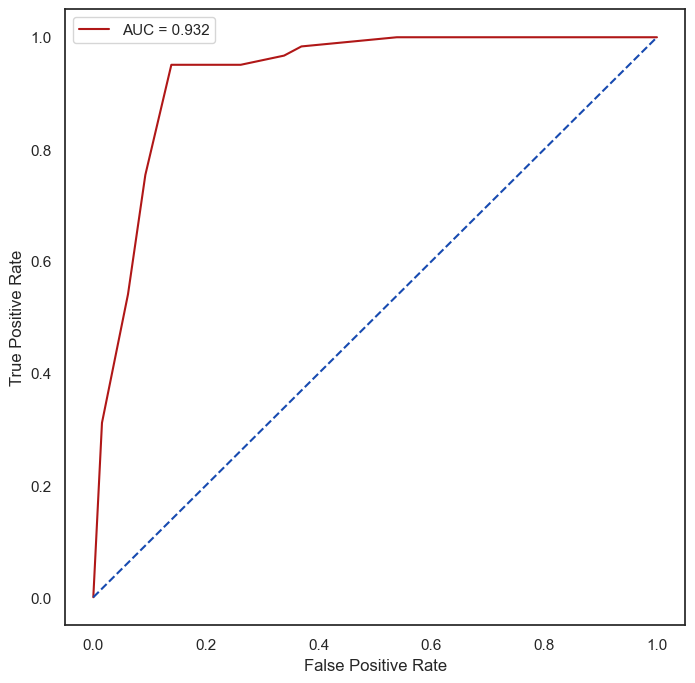

In [64]:
print(classification_report(y_test, y_pred_random))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob_random)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred_random))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm_random, cmap = 'Blues',
            annot = True,
            fmt = 'd',
            linewidths = 5,
            cbar = False,
            annot_kws = {'fontsize': 15}, 
            yticklabels = ["Abnormal"], 
            xticklabels = ["Normal"])
plt.yticks(rotation = 0)
plt.show()
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_random)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

NEURAL NETWORK ALGORITHM

In [65]:
# Import necessary modules
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [66]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,),
                    activation='identity',
                    solver='lbfgs')
mlp.fit(X_train,y_train)
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [67]:
cm_mlp = confusion_matrix(y_train,predict_train)
print(classification_report(y_train,predict_train))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       145
           1       0.88      0.92      0.90       149

    accuracy                           0.90       294
   macro avg       0.90      0.90      0.90       294
weighted avg       0.90      0.90      0.90       294



In [68]:
y_prob_mlp = mlp.predict_proba(X_test)[:,1]
y_prob_mlp

array([3.48022141e-03, 6.69734694e-01, 5.50983271e-01, 8.38357645e-04,
       2.33923223e-05, 3.81492849e-05, 8.22936005e-01, 9.52507979e-01,
       5.56061987e-05, 9.96350732e-01, 9.38303416e-03, 4.23603807e-03,
       9.10992934e-03, 9.35241663e-01, 9.10450562e-01, 4.35847773e-05,
       7.01090398e-05, 9.31141802e-01, 9.99566608e-01, 9.99653383e-01,
       1.76587081e-01, 8.20212446e-01, 9.68671216e-01, 3.14141132e-03,
       2.78813553e-01, 3.60758093e-01, 8.90700517e-01, 4.90330788e-04,
       7.68097898e-04, 2.56137082e-07, 9.28895787e-01, 9.13954162e-01,
       9.49434727e-01, 4.09548645e-01, 1.37728905e-08, 9.87530816e-01,
       8.98804817e-01, 1.20074390e-02, 7.55642570e-09, 8.86065458e-01,
       3.16790864e-01, 5.33835847e-01, 1.64987830e-09, 9.85102735e-01,
       1.08049860e-05, 4.70583005e-12, 1.87864723e-02, 4.95668532e-06,
       1.74514361e-01, 8.65199117e-04, 4.96210841e-04, 9.27029304e-01,
       9.88324316e-01, 9.53155362e-01, 4.61881720e-03, 9.95166954e-01,
      

In [69]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[51 14]
 [ 7 54]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        65
           1       0.79      0.89      0.84        61

    accuracy                           0.83       126
   macro avg       0.84      0.83      0.83       126
weighted avg       0.84      0.83      0.83       126



In [70]:
model_acuracy_mlp = accuracy_score(y_test, predict_test)
print("Model accuracy is :",model_acuracy_mlp)

Model accuracy is : 0.8333333333333334


              precision    recall  f1-score   support

           0       0.88      0.78      0.83        65
           1       0.79      0.89      0.84        61

    accuracy                           0.83       126
   macro avg       0.84      0.83      0.83       126
weighted avg       0.84      0.83      0.83       126

ROC AUC score: 0.9187894073139975
Accuracy Score:  0.8333333333333334


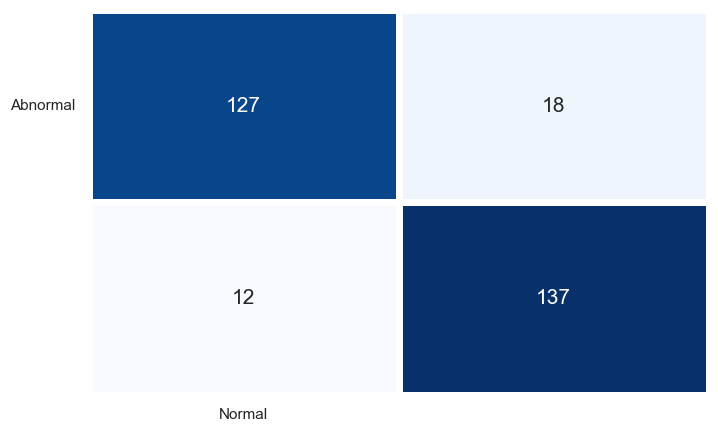

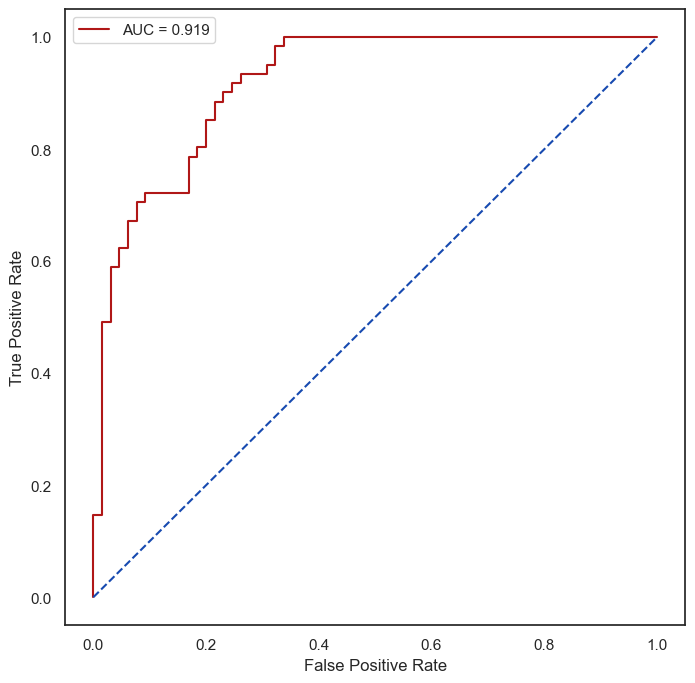

In [71]:
print(classification_report(y_test, predict_test))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob_mlp)}')
print('Accuracy Score: ',accuracy_score(y_test, predict_test))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm_mlp, cmap = 'Blues', 
            annot = True,
            fmt = 'd', 
            linewidths = 5,
            cbar = False, 
            annot_kws = {'fontsize': 15}, 
            yticklabels = ["Abnormal"],
            xticklabels = ["Normal"])
plt.yticks(rotation = 0)
plt.show()
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_mlp)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

MODEL COMPARISON

In [72]:
models = []
models.append(['SVM', svc])
models.append(['Logistic Regreesion',log])
models.append(['Random Forest', random])
models.append(['Decision Tree', dct])
models.append(['Neural Network', mlp])
               
lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)               


SVM :
[[50 15]
 [ 7 54]]
Accuracy Score:  0.8253968253968254

K-Fold Validation Mean Accuracy: 89.45 %

Standard Deviation: 4.19 %

ROC AUC Score: 0.83

Precision: 0.78

Recall: 0.89

F1: 0.83
-----------------------------------

Logistic Regreesion :
[[49 16]
 [ 6 55]]
Accuracy Score:  0.8253968253968254

K-Fold Validation Mean Accuracy: 89.11 %

Standard Deviation: 5.19 %

ROC AUC Score: 0.83

Precision: 0.77

Recall: 0.90

F1: 0.83
-----------------------------------

Random Forest :
[[54 11]
 [ 6 55]]
Accuracy Score:  0.8650793650793651

K-Fold Validation Mean Accuracy: 88.09 %

Standard Deviation: 6.89 %

ROC AUC Score: 0.87

Precision: 0.83

Recall: 0.90

F1: 0.87
-----------------------------------

Decision Tree :
[[49 16]
 [10 51]]
Accuracy Score:  0.7936507936507936

K-Fold Validation Mean Accuracy: 82.99 %

Standard Deviation: 7.05 %

ROC AUC Score: 0.79

Precision: 0.76

Recall: 0.84

F1: 0.80
-----------------------------------

Neural Network :
[[51 14]
 [ 7 54]]
Accuracy

In [73]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])


In [74]:
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
2,Random Forest,86.507937,88.091954,6.891607,0.866204,0.833333,0.901639,0.866142
4,Neural Network,83.333333,89.126437,4.706809,0.834931,0.794118,0.885246,0.837209
0,SVM,82.539683,89.448276,4.186749,0.827238,0.782609,0.885246,0.830769
1,Logistic Regreesion,82.539683,89.114943,5.185947,0.827743,0.774648,0.901639,0.833333
3,Decision Tree,79.365079,82.988506,7.050391,0.794956,0.761194,0.836066,0.796875
